Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

Importing the Dataset

In [29]:
df = pd.read_csv("C:/Users/bhaumik/Downloads/4_SalaryEstimator_K-NearestNeighbour/4_SalaryEstimator_K-NearestNeighbour/salary.csv")

Preprocessing the Dataset

In [30]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [31]:
df.shape

(32561, 5)

Finding Unique values and Mapping them

In [32]:
print(df.income.unique())

['<=50K' '>50K']


In [33]:
df['income'] = df['income'].map({'<=50K':0, '>50K':1}).astype(int)

In [34]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


Segregating X & Y

In [35]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
print(X)
print(Y)

[[90  9  0 40]
 [82  9  0 18]
 [66 10  0 40]
 ...
 [40  9  0 40]
 [58  9  0 40]
 [22  9  0 20]]
[0 0 0 ... 1 0 0]


Train , Test , Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X ,Y , test_size = 0.20 )

Standardization of Dataset

finding the best K- value


Text(0, 0.5, 'mean error')

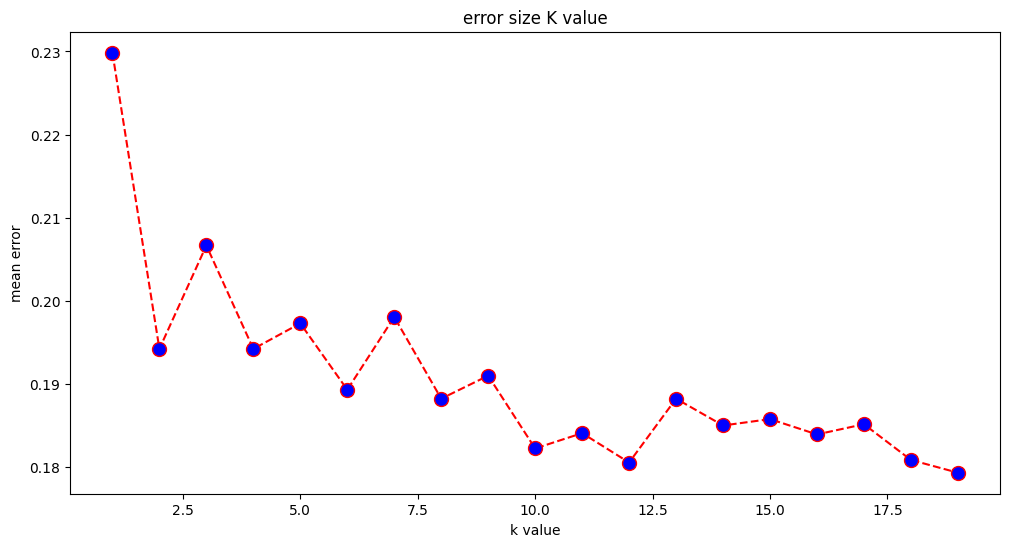

In [37]:
error = []
for i in range (1,20):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors= i).fit(X_train, y_train) 
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    knn
plt.figure(figsize= (12, 6))
plt.plot(range(1,20),error , color ="red",linestyle = "dashed", marker = "o", markerfacecolor="blue",markersize = 10)
plt.title("error size K value")
plt.xlabel("k value")
plt.ylabel("mean error")


Training the Model

In [42]:
knn = KNeighborsClassifier(n_neighbors= 10, metric = "minkowski", p = 2).fit(X_train, y_train)
knn
yhat = knn.predict(X_test)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
age = int(input("enter new employee age: "))
edu = int(input("enter new employee education: ")) 
cg  = int(input("enter new employee capital gain: "))
hw = int(input("enter new employee hours: "))
newEmp = [[age,edu,cg,hw]]
result = knn.predict(newEmp)
print(result)

if result == 1:
    print("employee might get salary above 50k")
else:
    print("employee might get salary below 50k")

enter new employee age: 24
enter new employee education: 8
enter new employee capital gain: 0
enter new employee hours: 40
[0]
employee might get salary below 50k


In [43]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("confusion matrix: ",metrics.confusion_matrix(y_test,yhat))

Train set Accuracy:  0.8364941646191646
Test set Accuracy:  0.8177491171503147
confusion matrix:  [[4698  278]
 [ 909  628]]
